In [1]:
# Copyright 2024 Keysight Technologies Inc.

In [2]:
import trueq as tq
import qiskit as qk

In [3]:
have_credentials = False

if have_credentials:
    qk.IBMQ.load_account()
    provider = qk.IBMQ.get_provider()
    backend = provider.get_backend("ibmq_manila")
else:
    from qiskit_aer import AerSimulator
    from qiskit.providers.fake_provider import FakeMelbourneV2

    backend = AerSimulator.from_backend(FakeMelbourneV2())

         (/tmp/ipykernel_310089/41091723.py:11)


In [4]:
# Define a simple 2-qubit circuit to work with.
circuit = tq.Circuit([{0: tq.Gate.h}, {(0, 1): tq.Gate.cx}])
circuit.measure_all()

ex = tq.interface.Executor(circuit, backend, n_shots=128)

# the executor is asynchronous, call a blocking function to wait for it to finish
ex.block()

True-Q formatting will not be loaded without trusting this
notebook or rerunning the affected cells. Notebooks can be marked as trusted by clicking
"File -> Trust Notebook".

ValueError: A circuit specifies gates between the qubits {frozenset({0, 1})}, but these qubits are not connected on aer_simulator_from(fake_melbourne).

Results({}, dim=None)


TypeError: unsupported operand type(s) for ** or pow(): 'NoneType' and 'int'

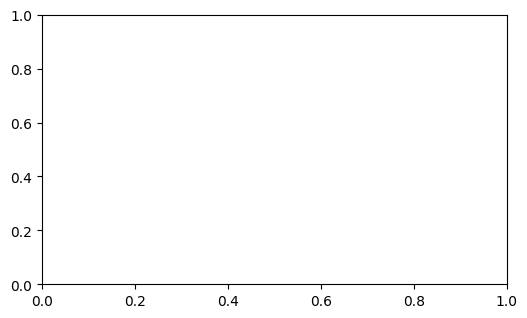

In [5]:
print(circuit.results)
circuit.results.plot()

In [6]:
# Define a 3-qubit cycle to work with.
cycle = {0: tq.Gate.x, 1: tq.Gate.y, 2: tq.Gate.h}

# Generate a circuit collection to measure noise.
circuits = tq.make_knr(cycle, [4, 32, 64], 24)

In [7]:
ro_circuits = tq.make_rcal(circuits.labels)
batches = circuits.batch(74, extra_circuits=ro_circuits, sequencer=tq.sequencer.RIFFLER)

True-Q formatting will not be loaded without trusting this
notebook or rerunning the affected cells. Notebooks can be marked as trusted by clicking
"File -> Trust Notebook".

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

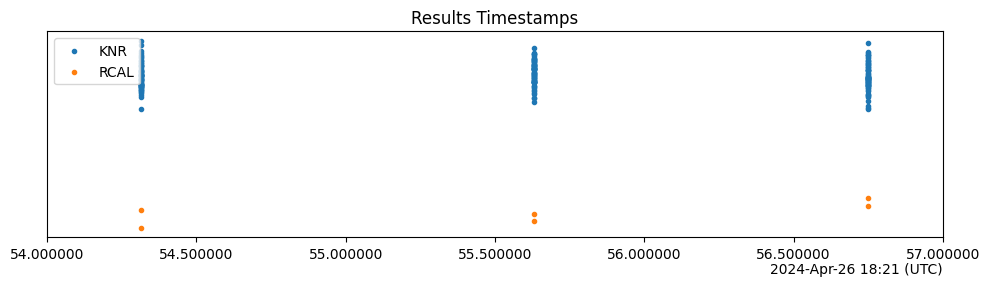

In [8]:
ex = tq.interface.Executor(batches, backend, n_shots=128)

# the executor is asynchronous, call a blocking function to wait for it to finish
ex.block()

circuits.plot.timestamps()

In [9]:
config = tq.interface.qiskit.config_from_backend(backend)
transpiler = tq.Compiler.from_config(config)

In [10]:
circuit = tq.Circuit([{4: tq.Gate.random(2), 5: tq.Gate.x}])
circuit

Circuit(Cycle((4,): Gate(Y, X, ...), (5,): Gate.x))

In [11]:
transpiled_circuit = transpiler.compile(circuit)
transpiled_circuit

Circuit(Cycle((4,): RZGate(phi), (5,): RZGate(phi)),Cycle((4,): SXGate(), (5,): SXGate()),Cycle((4,): RZGate(phi), (5,): RZGate(phi)),Cycle((4,): SXGate(), (5,): SXGate()),Cycle((4,): RZGate(phi), (5,): RZGate(phi)))